In [8]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import preprocessing
# Display plots inside Notebook
%matplotlib inline

In [9]:
# Disable warnings in Anaconda
import warnings
warnings.filterwarnings('ignore')

In [10]:
#SpreadSheet Datafile name
file = 'Datasets.xlsx'

#Load spreadsheet
data = pd.read_excel(file)

#Load Dataset 2 into DataFrame
ds2 = pd.read_excel(file, sheet_names = 'Dataset 2', index_col=0)

<h2>Filling missing values and Normalization</h2>

In [11]:
ds2.fillna(ds2.median(), inplace=True)
min_max_scaler = preprocessing.MinMaxScaler()
ds2[ds2.columns[5:90]] = min_max_scaler.fit_transform(ds2[ds2.columns[5:90]])
ds2_normalized = pd.DataFrame(ds2)
ds2_normalized.head()

,Team,League/Division,Season,Head Coach,Manager,A,AA,AB,B,BA,...,WW,WX,X,XX,XY,Y,YY,YZ,Z,ZZ
Athlete,,,,,,,,,,,,,,,,,,,,,
1,36,5.0,1,7,13.0,0.894737,0.857143,0.875,0.584098,0.582996,...,0.95,0.827586,1.000000,0.80,1.000000,0.717413,0.733333,0.666667,0.875,0.857143
2,50,5.0,1,7,13.0,1.000000,0.914286,1.000,0.576394,0.582996,...,0.95,0.620690,0.733333,0.56,1.000000,0.717413,0.733333,0.722222,0.875,0.857143
3,41,5.0,1,7,13.0,0.894737,0.714286,0.750,0.564839,0.582996,...,0.95,0.758621,0.766667,0.72,1.000000,0.717413,0.666667,0.861111,0.875,0.857143
4,60,1.0,1,10,29.0,0.947368,0.571429,0.875,0.706530,0.757085,...,0.95,0.655172,0.666667,0.60,0.978947,0.767740,0.166667,1.000000,0.875,1.000000
5,22,1.0,1,10,29.0,0.947368,0.857143,0.750,0.668012,0.757085,...,0.95,0.137931,0.000000,0.60,0.978947,0.767740,0.833333,0.638889,0.750,0.942857


<h1>Plots</h1>

<h2>Plot feature “LM” with respect to “Head coach”</h2>

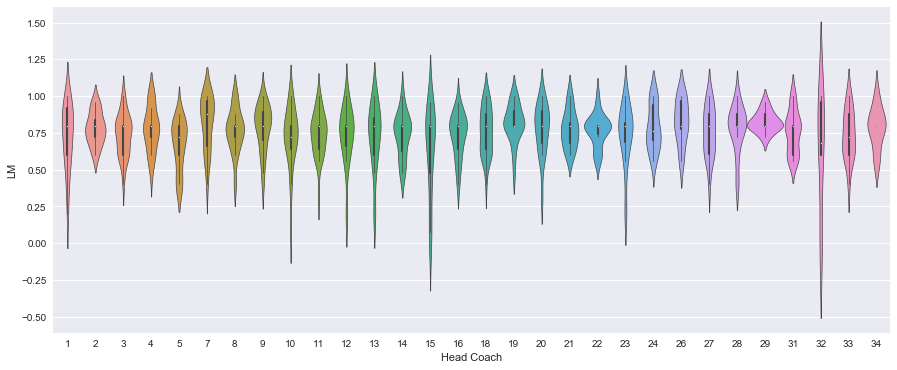

In [31]:
plt.figure(figsize=(15,6))
sns.violinplot(data=ds2, x='Head Coach', y='LM', linewidth=0.7, width=1.3)

<h2>Plot feature “PQ” with respect to “Manager” and “Season”</h2>

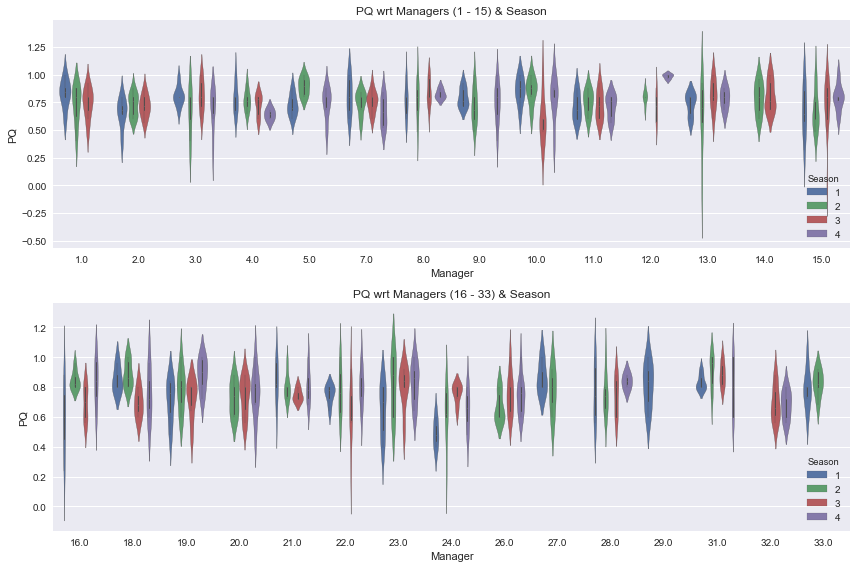

In [42]:
plt.figure(figsize=(12,8))

plt.subplot(211)
plt.title("PQ wrt Managers (1 - 15) & Season")
sns.violinplot(data=ds2[ds2.Manager < 16], x='Manager', y='PQ', hue='Season', linewidth = 0.3)

plt.subplot(212)
plt.title("PQ wrt Managers (16 - 33) & Season")
sns.violinplot(data=ds2[ds2.Manager > 15], x='Manager', y='PQ', hue='Season', linewidth = 0.3)

plt.tight_layout()

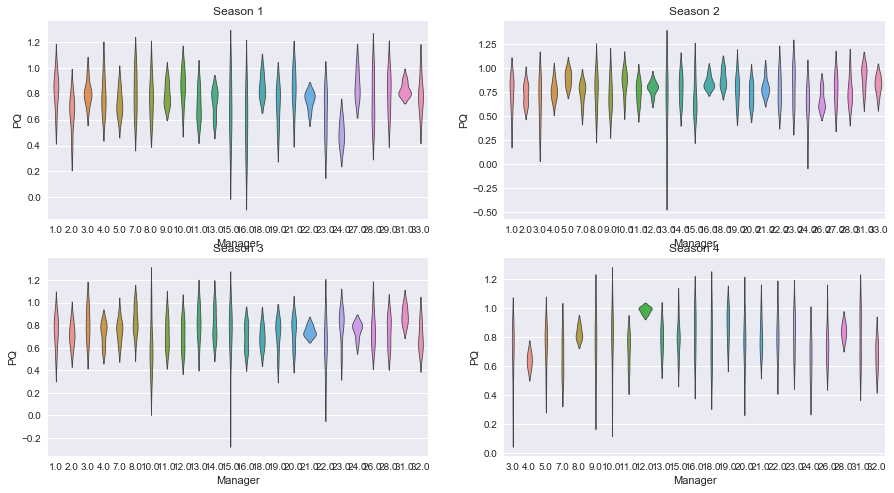

In [46]:
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
plt.title("Season 1")
sns.violinplot(x='Manager', y='PQ', data=ds2[ds2.Season==1], inner=None, linewidth=0.8)

plt.subplot(2,2,2)
plt.title("Season 2")
sns.violinplot(x='Manager', y='PQ', data=ds2[ds2.Season==2], inner=None, linewidth=0.8)

plt.subplot(2,2,3)
plt.title("Season 3")
sns.violinplot(x='Manager', y='PQ', data=ds2[ds2.Season==3], inner=None, linewidth=0.8)

plt.subplot(2,2,4)
plt.title("Season 4")
sns.violinplot(x='Manager', y='PQ', data=ds2[ds2.Season==4], inner=None, linewidth=0.8)

<h2>Plot feature “OO” with respect to “Head coach” and “Season”</h2> 

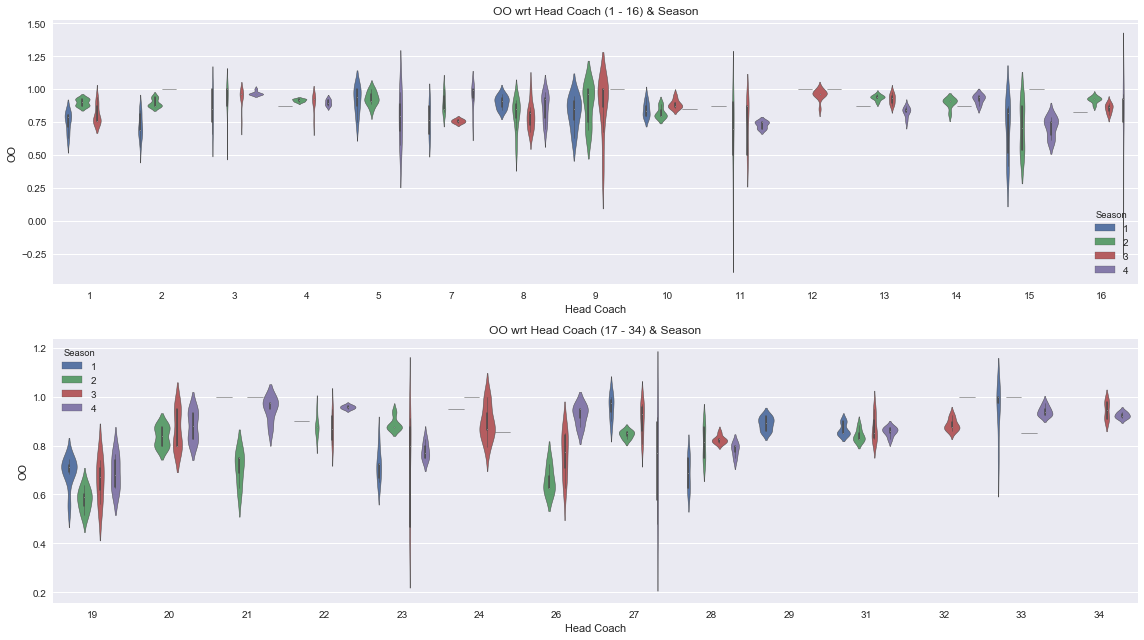

In [75]:
#Is there a better way to represent these?
plt.figure(figsize=(16,9))

plt.subplot(211)
plt.title("OO wrt Head Coach (1 - 16) & Season")
sns.violinplot(data=ds2[ds2['Head Coach'] < 17], x='Head Coach', y='OO', hue='Season', linewidth=0.5)

plt.subplot(212)
plt.title("OO wrt Head Coach (17 - 34) & Season")
sns.violinplot(data=ds2[ds2['Head Coach'] > 18], x='Head Coach', y='OO', hue='Season', linewidth=0.5)

plt.tight_layout()

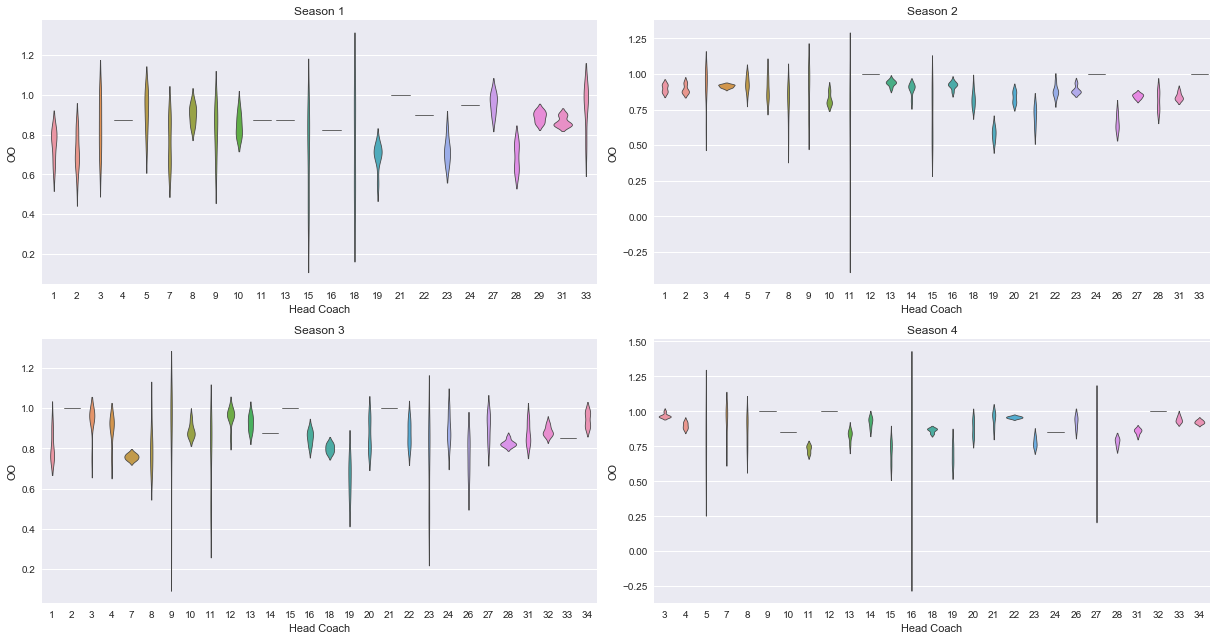

In [72]:
plt.figure(figsize=(17,9))

plt.subplot(2,2,1)
plt.title("Season 1")
sns.violinplot(x='Head Coach', y='OO', data=ds2[ds2.Season==1], inner=None, linewidth=0.8)

plt.subplot(2,2,2)
plt.title("Season 2")
sns.violinplot(x='Head Coach', y='OO', data=ds2[ds2.Season==2], inner=None, linewidth=0.8)

plt.subplot(2,2,3)
plt.title("Season 3")
sns.violinplot(x='Head Coach', y='OO', data=ds2[ds2.Season==3], inner=None, linewidth=0.8)

plt.subplot(2,2,4)
plt.title("Season 4")
sns.violinplot(x='Head Coach', y='OO', data=ds2[ds2.Season==4], inner=None, linewidth=0.8)

plt.tight_layout()
#what's with the horizontal lines?

<h2>Plot feature “BC” with respect to “LM” and “Season”</h2>

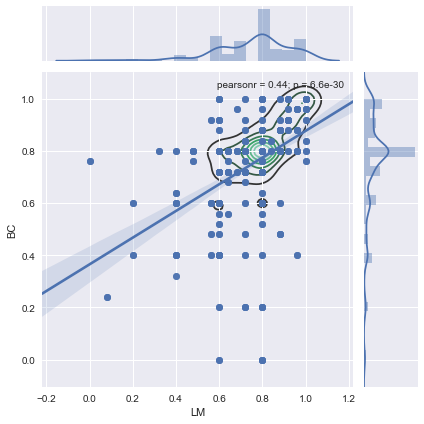

In [60]:
(sns.jointplot(data=ds2, x='LM', y='BC', kind='reg')).plot_joint(sns.kdeplot, zorder=0, n_levels=8)

Analysis:

Moderate correlation between BC & LM.

Most of data is aggregated around values of LM (0.6 - 1.0) and BC (0.7 - 1.0).

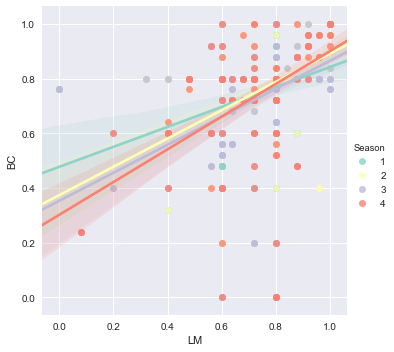

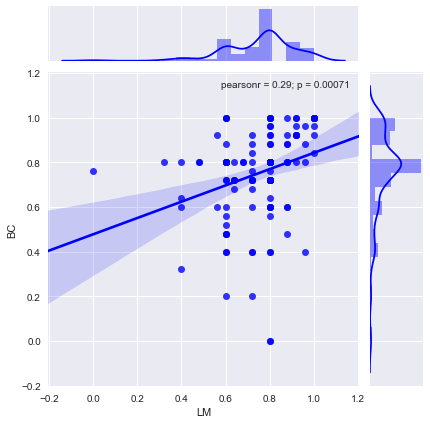

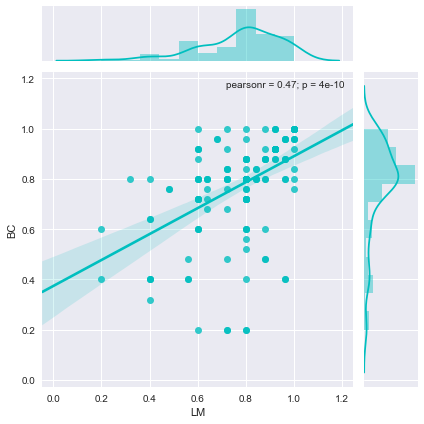

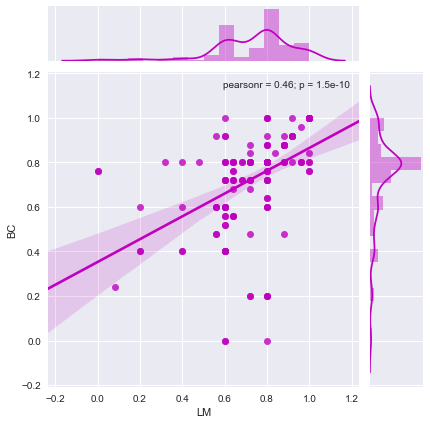

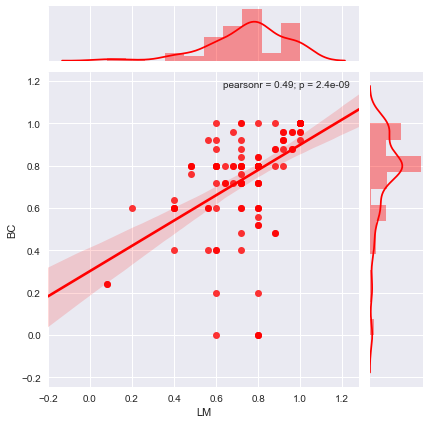

In [62]:
# Need help with analysis here
sns.lmplot(x='LM', y='BC', data=ds2, hue='Season', palette='Set3')


# Do you wanna keep these to compare the correlation with pearsonr per season aw baleha?
#sns.jointplot(x='LM', y='BC', data=ds2[ds2.Season==1], color='b', kind='reg')
#sns.jointplot(x='LM', y='BC', data=ds2[ds2.Season==2], color='c', kind='reg')
#sns.jointplot(x='LM', y='BC', data=ds2[ds2.Season==3], color='m', kind='reg')
#sns.jointplot(x='LM', y='BC', data=ds2[ds2.Season==4], color='r', kind='reg')

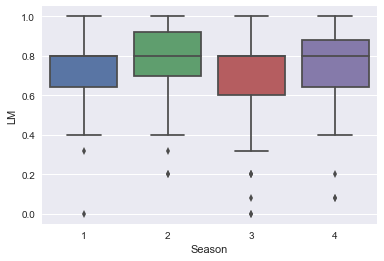

In [63]:
#Ensa?
sns.boxplot(data=ds2, x='Season', y='LM')

<h2>Plot feature “LM” with respect to “HH” and “Season”</h2>

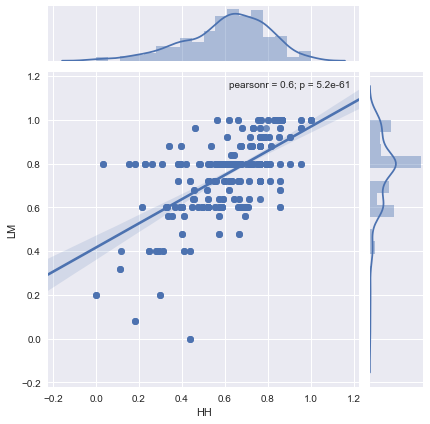

In [22]:
sns.jointplot(data=ds2, x='HH', y='LM', kind='reg')

Analysis:
r = 0.6, high correlation between LM & HH

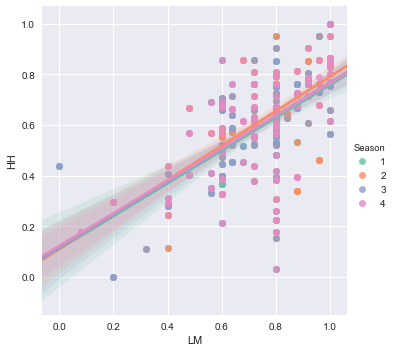

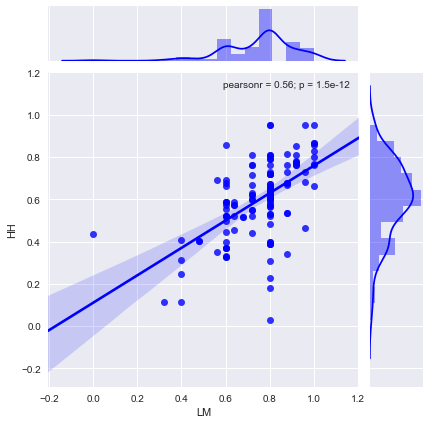

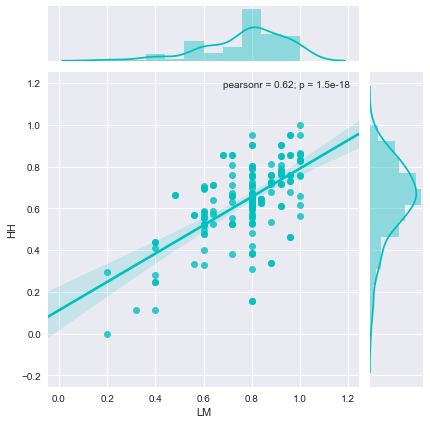

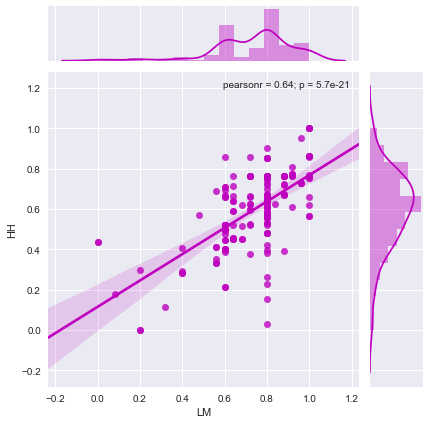

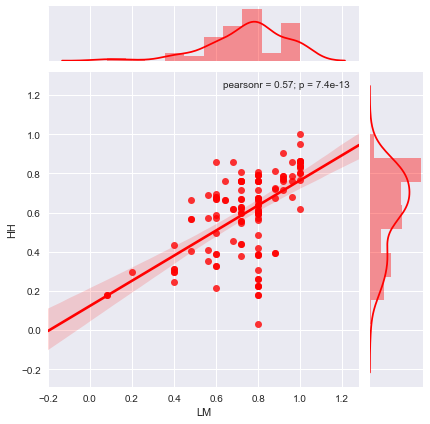

In [65]:
sns.lmplot(x='LM', y='HH', data=ds2, hue='Season', palette='Set2')

# Keep or remove these?
sns.jointplot(x='LM', y='HH', data=ds2[ds2.Season==1], color='b', kind='reg')
sns.jointplot(x='LM', y='HH', data=ds2[ds2.Season==2], color='c', kind='reg')
sns.jointplot(x='LM', y='HH', data=ds2[ds2.Season==3], color='m', kind='reg')
sns.jointplot(x='LM', y='HH', data=ds2[ds2.Season==4], color='r', kind='reg')

<h2>Plot feature “EF” with respect to “League/Division” and “Season” for the data instances without missing values in the “League/Division” feature</h2>

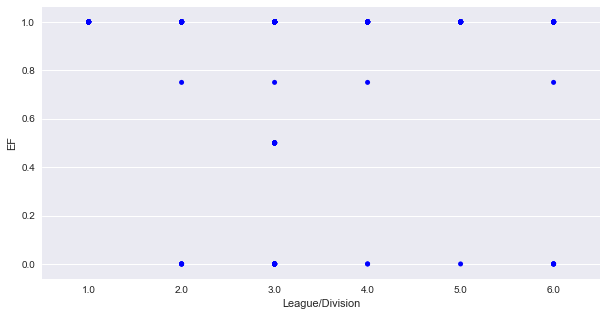

In [25]:
# HELP?
plt.figure(figsize=(10,5))
sns.stripplot(data=ds2, x='League/Division', y='EF', color='b')

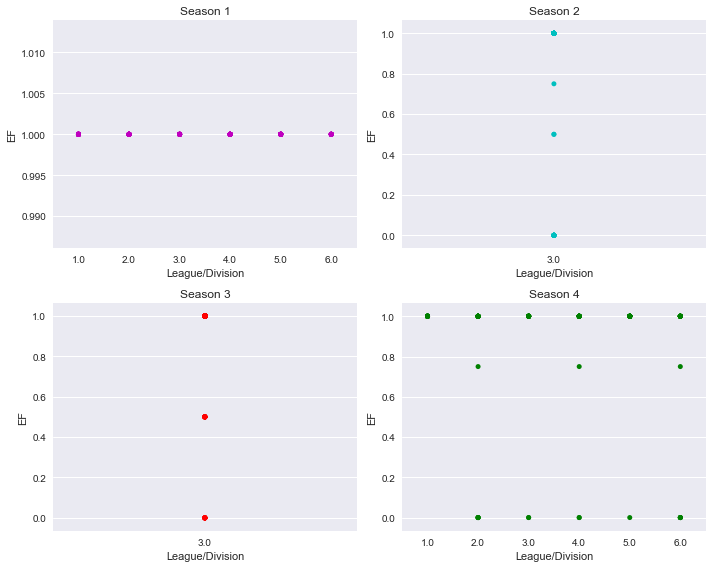

In [67]:
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.title("Season 1")
sns.stripplot(data=ds2[ds2.Season==1], x='League/Division', y='EF', color='m')

plt.subplot(2,2,2)
plt.title("Season 2")
sns.stripplot(data=ds2[ds2.Season==2], x='League/Division', y='EF', color='c')

plt.subplot(2,2,3)
plt.title("Season 3")
sns.stripplot(data=ds2[ds2.Season==3], x='League/Division', y='EF', color='r')

plt.subplot(2,2,4)
plt.title("Season 4")
sns.stripplot(data=ds2[ds2.Season==4], x='League/Division', y='EF', color='g')

plt.tight_layout()